In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [99]:
from google.colab import files

# Choose the file from your local machine using the file picker dialog
uploaded = files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data (1).csv


In [100]:
import pandas as pd

# Assume you uploaded a CSV file named 'example.csv'
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [101]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

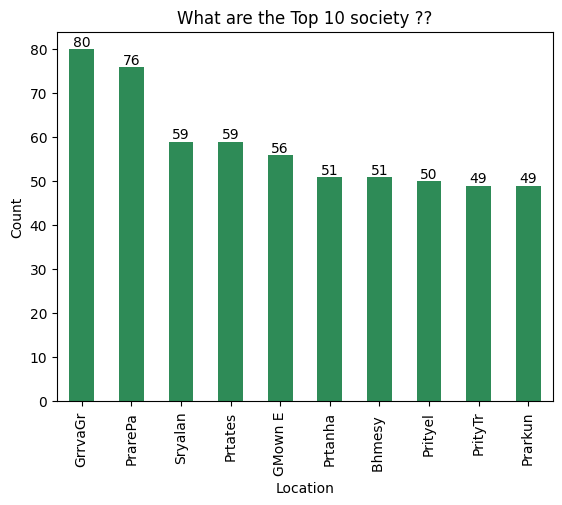

In [102]:
s = df['society'].value_counts().nlargest(10).plot(kind='bar', color='seagreen')

for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 society ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

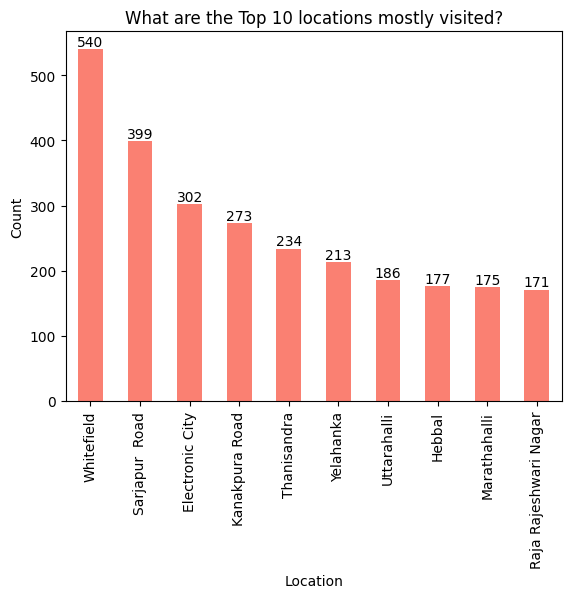

In [103]:
la = df['location'].value_counts().nlargest(10).plot(kind='bar', color='salmon')

for p in la.patches:
    la.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 locations mostly visited?')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [104]:
# Fill missing values in the 'size' column with the mean
df['size'].fillna(value=df['size'].mode(), inplace=True)

# Fill missing values in the 'bath' column using forward fill method
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
# Drop columns 'society' and 'availability'
df = df.drop(columns=['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [105]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [106]:

df.dropna(inplace=True)

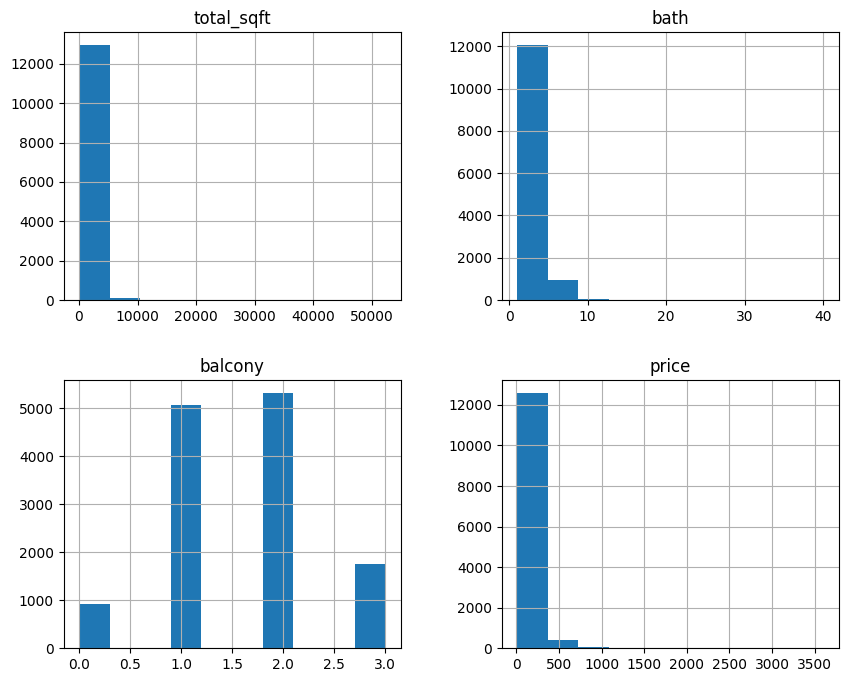

In [107]:
df.hist(figsize=(10,8))
plt.show()

In [108]:
df['size'].value_counts()

2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

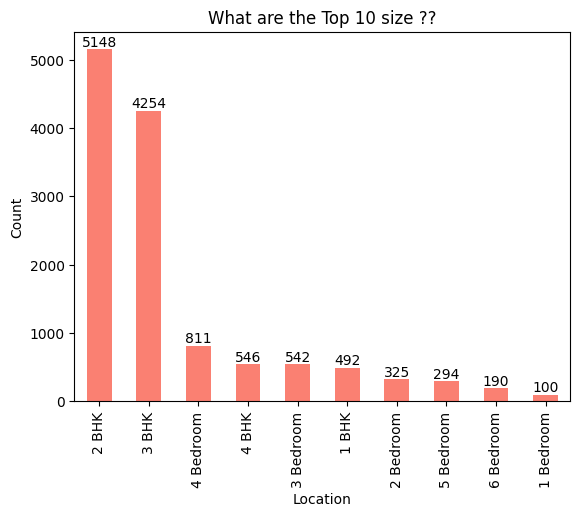

In [109]:
l = df['size'].value_counts().nlargest(10).plot(kind='bar', color='salmon')

for p in l.patches:
    l.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 size ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

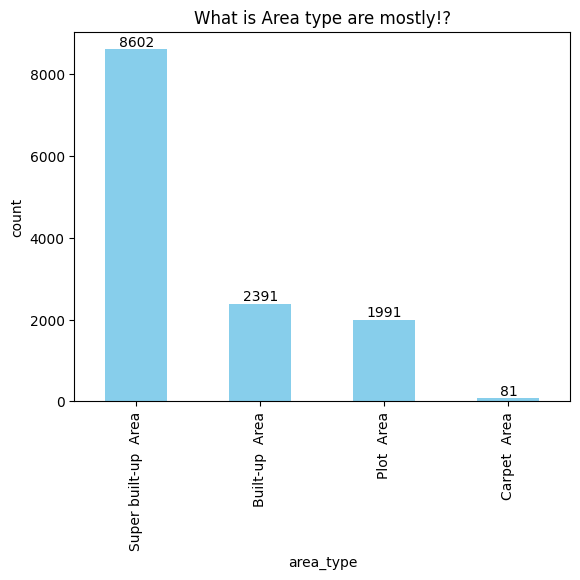

In [110]:
at=df['area_type'].value_counts().plot(kind='bar',color='skyblue')
for p in at.patches:
    at.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What is Area type are mostly!?')
plt.xlabel('area_type')
plt.ylabel('count')
plt.show()

In [111]:
df.describe()

,total_sqft,bath,balcony,price
count,13065.000000,13065.000000,13065.000000,13065.000000
mean,1554.546892,2.691772,1.605741,112.514048
std,1238.422934,1.335653,0.805588,149.662725
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


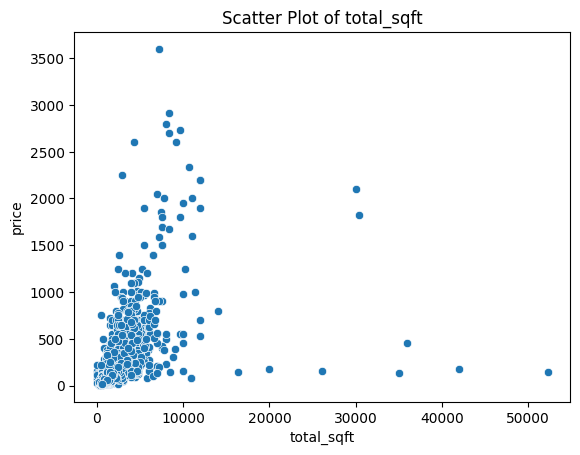

In [112]:
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.show()

In [113]:
df.loc[df['total_sqft'] >= 10000, 'total_sqft'] = np.nan

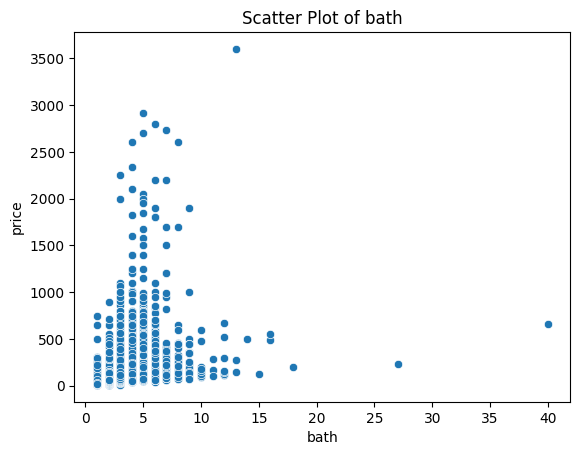

In [114]:
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Scatter Plot of bath')
plt.xlabel('bath')
plt.ylabel('price')
plt.show()

In [115]:
df.loc[df['bath'] >= 17.5, 'bath'] = np.nan

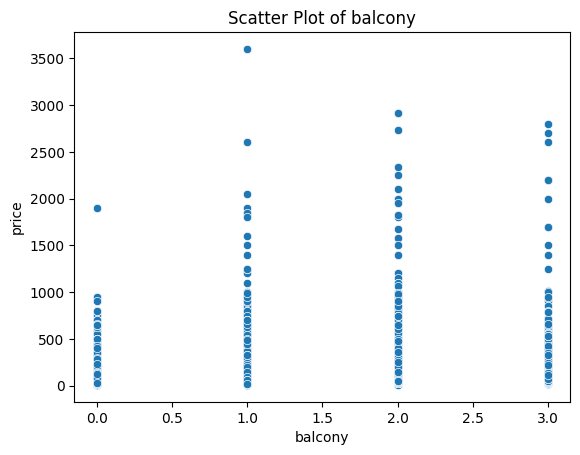

In [116]:
sns.scatterplot(x='balcony', y='price', data=df)
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')
plt.show()

In [117]:

df.isnull().sum()

area_type      0
size           0
total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [118]:
df

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super built-up Area,4 BHK,3600.0,5.0,0.0,400.00
13317,Built-up Area,2 BHK,1141.0,2.0,1.0,60.00
13318,Super built-up Area,4 BHK,4689.0,4.0,1.0,488.00


In [119]:
df.dropna(inplace=True)

In [120]:
df.drop(columns='area_type', inplace=True)

In [123]:
df.drop(columns='size', inplace=True)

In [124]:
df['sqft_price']=df['total_sqft']*df['price']

In [125]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

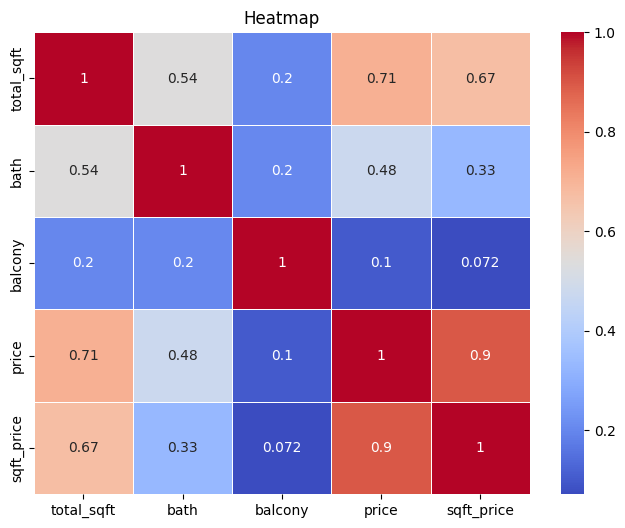

In [126]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap')
plt.show()

In [127]:
X = df.drop(['price'],axis='columns')
y = df.price

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
from sklearn.svm import SVR
lr_clf = SVR()

In [130]:
lr_clf.fit(X_train,y_train)

SVR()

In [131]:
lr_clf.score(X_train,y_train)

0.49084633414246825

In [132]:
y_pred=lr_clf.predict(X_test)

In [133]:
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,45.00,48.187868
1,162.00,107.458100
2,118.00,104.808114
3,86.65,75.337181
4,138.00,141.020610
...,...,...
2602,185.00,141.631625
2603,34.00,46.268524
2604,57.00,51.586420
2605,90.00,78.452402


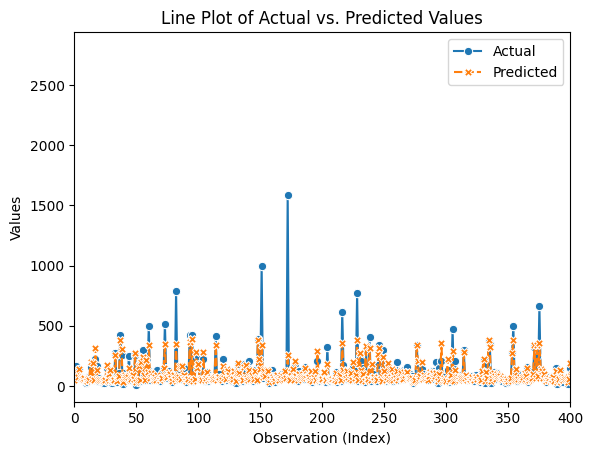

In [134]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [135]:

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr_clf.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr_clf.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  24.265961316326
R-squared (coefficient of determination) score is : -38.58%
Accuracy for Training: 49.08%
Accuracy for Testing: 54.34%


In [137]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling is often important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model
svr = SVR()

# Define the hyperparameter grid to search through
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("R-squared (R2) Score on Test Set:", r2)

Best Hyperparameters: {'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error on Test Set: 3096.6493856342354
R-squared (R2) Score on Test Set: 0.8266910798091147


In [ ]:
## Now train the model again with above hyperparameter for better accuracy of r2 of 0.8266